## Day 83 Lecture 2 Assignment

In this assignment, we will learn about other optimization algorithms. We will create a neural network and try out the different optimization algorithms and compare their performance.

In [3]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In this assignment, we will be using the cancer data that we have worked with in previous lessons. The pre-processed data is loaded below.

In [4]:
cancer = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/cancer_processed.csv')

In [19]:
cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


As you may recall, diagnosis is the target variable. One hot encode the diagnosis column.

In [44]:
# Answer below:
dummy = pd.get_dummies(cancer, columns=['diagnosis'], drop_first=True)
dummy.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


Split the data into train and test with 20% of the data in test.

In [45]:
# Answer below
X = dummy.drop(columns=['diagnosis_M'])
y = dummy['diagnosis_M']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Scale all other variables using the standard scaler.

In [46]:
# Answer below:
scaler = StandardScaler()
train_scale = scaler.fit_transform(X_train)
test_scale = scaler.transform(X_test)

Generate a sequential model consisting of 5 layers. The layers should be of size 128, 64, 32, 32, 1. Use the appropriate activation for the output layer based on the type of prediction algorithm we are producing.

In [66]:
# Answer below
def build_model(opt, batch_size, epochs):
  model = Sequential()
  model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  his = model.fit(train_scale, y_train, validation_data=(test_scale, y_test), batch_size=100, epochs=200)
  df = pd.DataFrame(his.history)
  return df


Initialize a SGD optimizer with learning rate 0.05 and momentum 0.9.

In [48]:
# Answer below:
sgd = SGD(learning_rate=.05, momentum=.9)


Compile and fit the model using the appropriate loss function and metric and use the optimizers defined above.

batch size = 100, epochs = 200

In [67]:
# Answer below:
sgd_df = build_model(sgd,batch_size=100,epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 48ms/step - loss: 0.6437 - accuracy: 0.8740 - val_loss: 0.5537 - val_accuracy: 0.8421
Epoch 2/200
5/5 [==============================] - 0s 12ms/step - loss: 0.5075 - accuracy: 0.8799 - val_loss: 0.3659 - val_accuracy: 0.8509
Epoch 3/200
5/5 [==============================] - 0s 11ms/step - loss: 0.2974 - accuracy: 0.9067 - val_loss: 0.2020 - val_accuracy: 0.9298
Epoch 4/200
5/5 [==============================] - 0s 12ms/step - loss: 0.1614 - accuracy: 0.9423 - val_loss: 0.1608 - val_accuracy: 0.9298
Epoch 5/200
5/5 [==============================] - 0s 47ms/step - loss: 0.1771 - accuracy: 0.9229 - val_loss: 0.1469 - val_accuracy: 0.9474
Epoch 6/200
5/5 [==============================] - 0s 12ms/step - loss: 0.1573 - accuracy: 0.9315 - val_loss: 0.1400 - val_accuracy: 0.9561
Epoch 7/200
5/5 [==============================] - 0s 12ms/step - loss: 0.1372 - accuracy: 0.9441 - val_loss: 0.1526 - val_accuracy: 0.9474
Epoch 8/200
5/5 [===

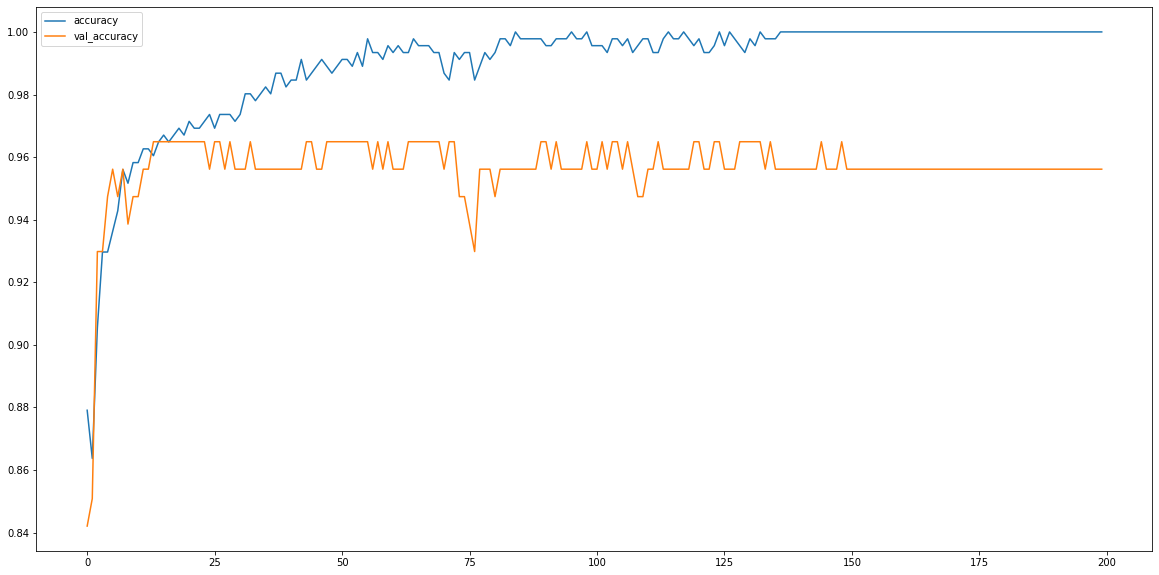

In [70]:
sgd_df[['accuracy','val_accuracy']].plot(figsize=(20,10))

Define the RMSprop optimizer with a learning rate of 0.05.

In [68]:
# Answer below:
rms = RMSprop(learning_rate=.05)

Compile and fit the model using the optimizer defined above. What do you notice about the accuracy?

In [69]:
# Answer below:
rms_df = build_model(rms, 100, 200)

Epoch 1/200
5/5 [==============================] - 1s 50ms/step - loss: 14.7276 - accuracy: 0.6142 - val_loss: 0.2043 - val_accuracy: 0.9386
Epoch 2/200
5/5 [==============================] - 0s 13ms/step - loss: 0.3541 - accuracy: 0.8513 - val_loss: 0.1808 - val_accuracy: 0.9474
Epoch 3/200
5/5 [==============================] - 0s 12ms/step - loss: 0.1645 - accuracy: 0.9337 - val_loss: 0.1467 - val_accuracy: 0.9386
Epoch 4/200
5/5 [==============================] - 0s 13ms/step - loss: 0.1145 - accuracy: 0.9521 - val_loss: 0.1862 - val_accuracy: 0.9649
Epoch 5/200
5/5 [==============================] - 0s 13ms/step - loss: 0.1549 - accuracy: 0.9399 - val_loss: 0.1163 - val_accuracy: 0.9561
Epoch 6/200
5/5 [==============================] - 0s 14ms/step - loss: 0.1278 - accuracy: 0.9498 - val_loss: 0.1725 - val_accuracy: 0.9474
Epoch 7/200
5/5 [==============================] - 0s 48ms/step - loss: 0.1855 - accuracy: 0.9258 - val_loss: 0.1756 - val_accuracy: 0.9474
Epoch 8/200
5/5 [==

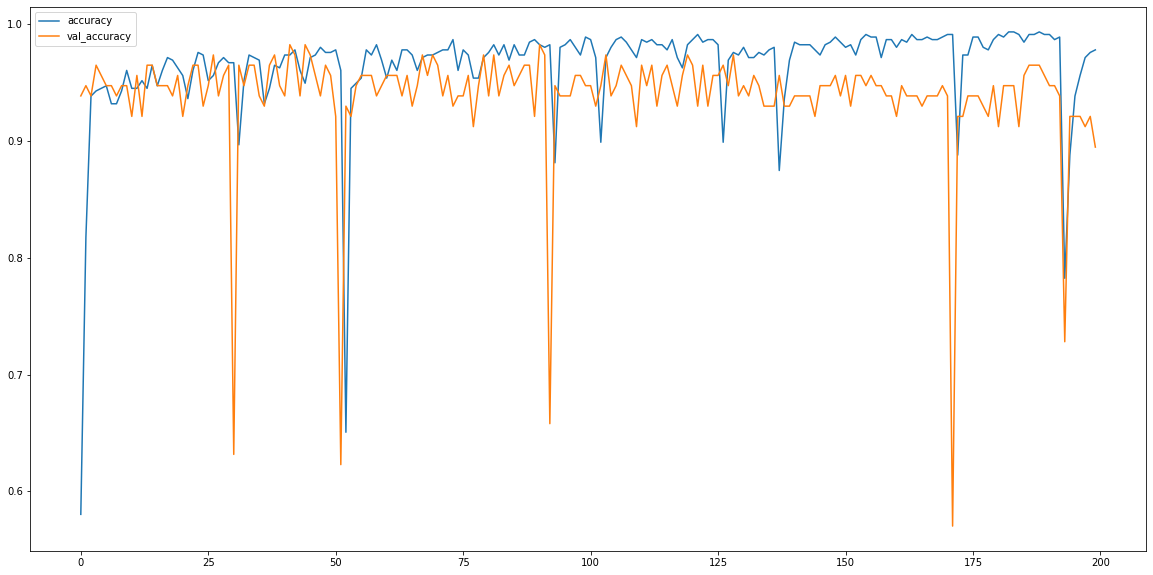

In [71]:
rms_df[['accuracy','val_accuracy']].plot(figsize=(20,10))

Define the Adam optimizer with learning rate 0.01

In [72]:
# Answer below:
adam = Adam(learning_rate=.01)


Compile and fit the model using the optimizer defined above. How does the peformance differ with this optimizer?

In [73]:
# Answer below:
adam_df = build_model(adam, 100, 200)


Epoch 1/200
5/5 [==============================] - 1s 48ms/step - loss: 0.5527 - accuracy: 0.6905 - val_loss: 0.2125 - val_accuracy: 0.9561
Epoch 2/200
5/5 [==============================] - 0s 12ms/step - loss: 0.1724 - accuracy: 0.9346 - val_loss: 0.1302 - val_accuracy: 0.9474
Epoch 3/200
5/5 [==============================] - 0s 12ms/step - loss: 0.1629 - accuracy: 0.9315 - val_loss: 0.1170 - val_accuracy: 0.9737
Epoch 4/200
5/5 [==============================] - 0s 13ms/step - loss: 0.1267 - accuracy: 0.9434 - val_loss: 0.1467 - val_accuracy: 0.9386
Epoch 5/200
5/5 [==============================] - 0s 13ms/step - loss: 0.1316 - accuracy: 0.9557 - val_loss: 0.1509 - val_accuracy: 0.9386
Epoch 6/200
5/5 [==============================] - 0s 12ms/step - loss: 0.1068 - accuracy: 0.9568 - val_loss: 0.1219 - val_accuracy: 0.9474
Epoch 7/200
5/5 [==============================] - 0s 13ms/step - loss: 0.0892 - accuracy: 0.9617 - val_loss: 0.0979 - val_accuracy: 0.9649
Epoch 8/200
5/5 [===

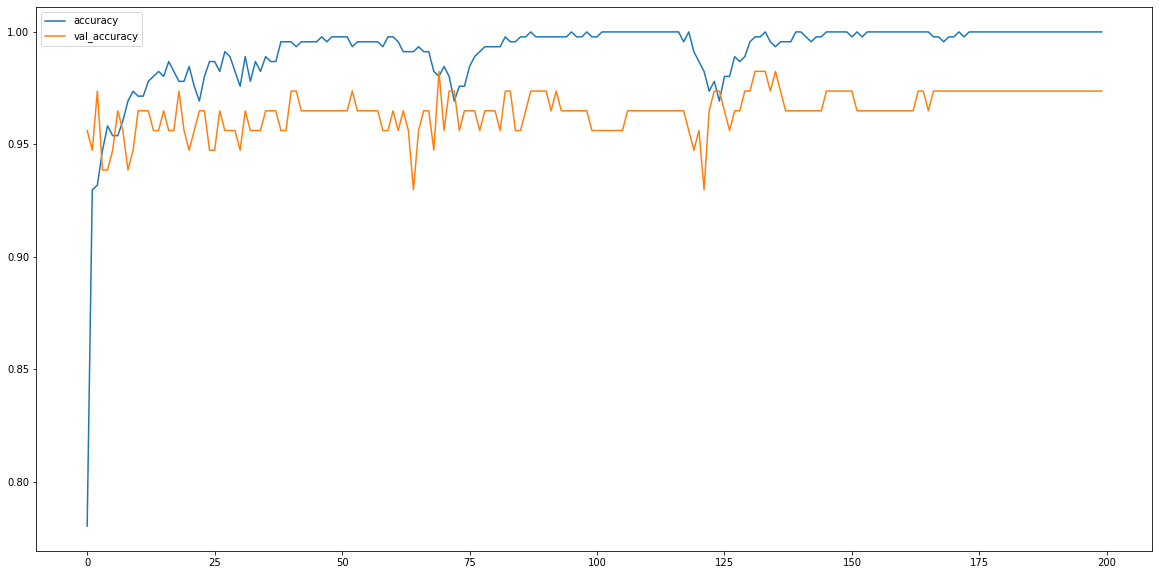

In [74]:
adam_df[['accuracy','val_accuracy']].plot(figsize=(20,10))

Now change the learning rate to 0.1 in your Adam optimizer and compare the results (both speed and accuracy).

In [75]:
# Answer below:
adam1 = Adam(learning_rate=.01)


In [77]:
import time
start = time.time()
adam1_df = build_model(adam1, 100, 200)

print(f'runtime:{time.time()-start} seconds')

Epoch 1/200
5/5 [==============================] - 1s 55ms/step - loss: 0.5734 - accuracy: 0.6680 - val_loss: 0.1593 - val_accuracy: 0.9386
Epoch 2/200
5/5 [==============================] - 0s 15ms/step - loss: 0.1675 - accuracy: 0.9438 - val_loss: 0.1659 - val_accuracy: 0.9474
Epoch 3/200
5/5 [==============================] - 0s 14ms/step - loss: 0.1728 - accuracy: 0.9411 - val_loss: 0.2519 - val_accuracy: 0.9123
Epoch 4/200
5/5 [==============================] - 0s 16ms/step - loss: 0.1323 - accuracy: 0.9519 - val_loss: 0.2041 - val_accuracy: 0.9386
Epoch 5/200
5/5 [==============================] - 0s 14ms/step - loss: 0.1739 - accuracy: 0.9378 - val_loss: 0.1326 - val_accuracy: 0.9649
Epoch 6/200
5/5 [==============================] - 0s 16ms/step - loss: 0.0993 - accuracy: 0.9569 - val_loss: 0.1534 - val_accuracy: 0.9298
Epoch 7/200
5/5 [==============================] - 0s 16ms/step - loss: 0.0980 - accuracy: 0.9596 - val_loss: 0.1372 - val_accuracy: 0.9386
Epoch 8/200
5/5 [===

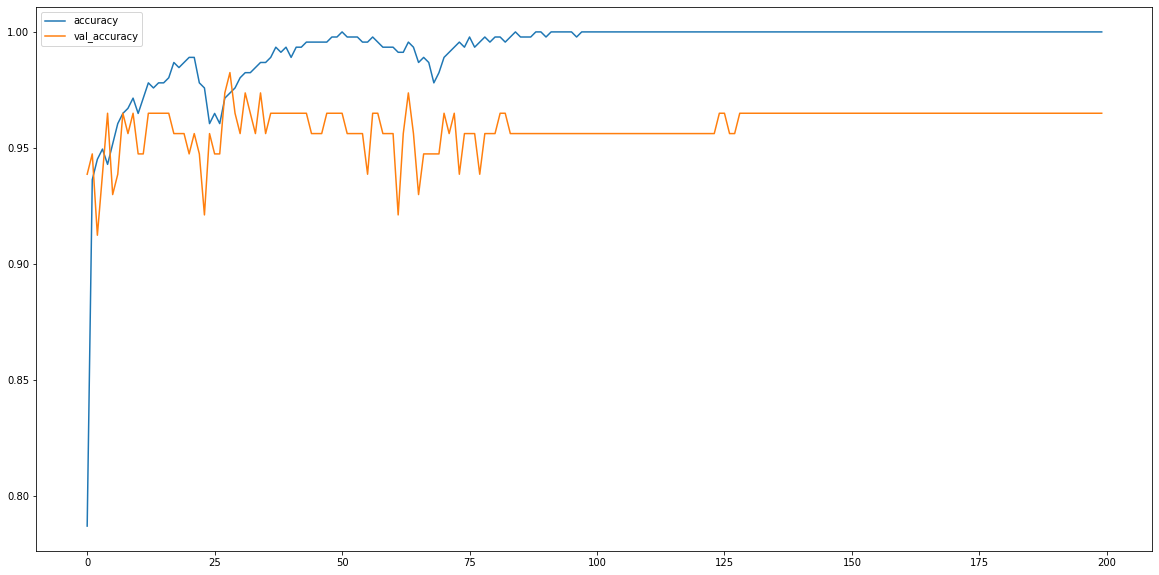

In [78]:
adam1_df[['accuracy','val_accuracy']].plot(figsize=(20,10))